## Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
data=pd.read_excel("/content/heart_disease.xlsx",sheet_name=1)

# EDA

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
data=data.rename(columns={"num":"stages"}) #Renaming the column name

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,stages
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


## Visualizations

<Axes: xlabel='stages'>

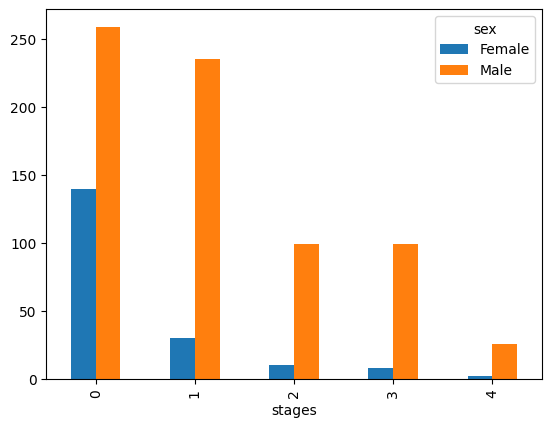

In [ ]:
pd.crosstab(data.stages,data.sex).plot(kind="bar")

<Axes: ylabel='count'>

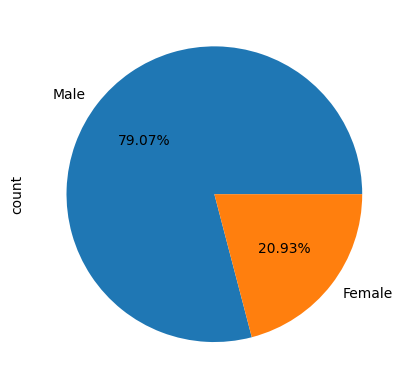

In [ ]:
data["sex"].value_counts().plot(kind="pie",autopct="%1.2f%%")

<Axes: ylabel='count'>

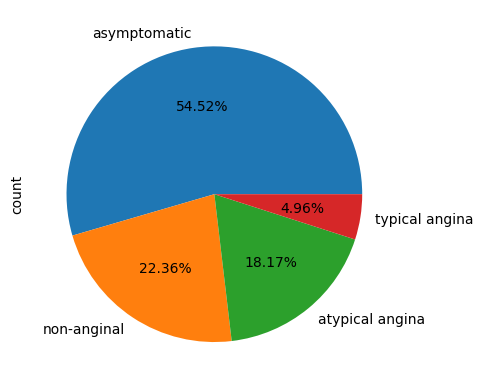

In [ ]:
data["cp"].value_counts().plot(kind="pie",autopct="%1.2f%%")

<Axes: ylabel='count'>

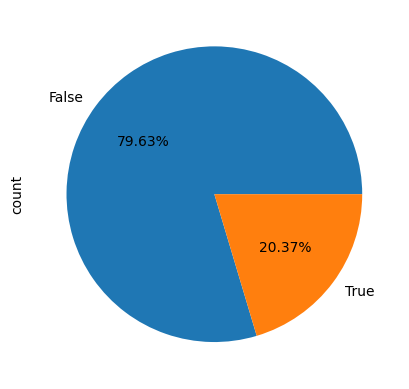

In [ ]:
data["fbs"].value_counts().plot(kind="pie",autopct="%1.2f%%")

<Axes: ylabel='count'>

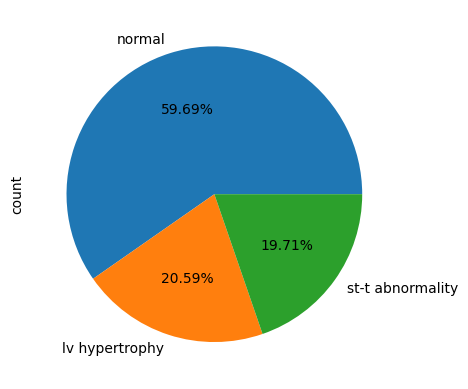

In [ ]:
data["restecg"].value_counts().plot(kind="pie",autopct="%1.2f%%")

<Axes: ylabel='count'>

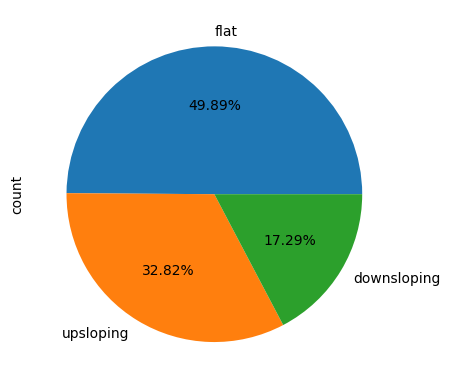

In [ ]:
data["slope"].value_counts().plot(kind="pie",autopct="%1.2f%%")

<Axes: ylabel='count'>

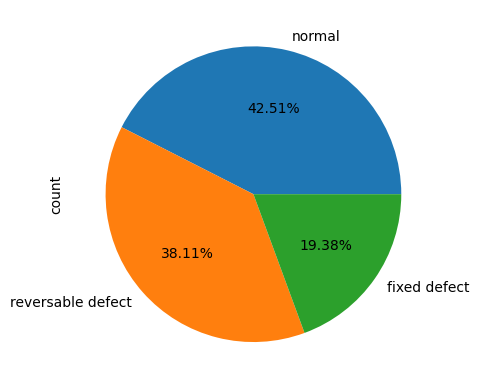

In [ ]:
data["thal"].value_counts().plot(kind="pie",autopct="%1.2f%%")

<Axes: ylabel='count'>

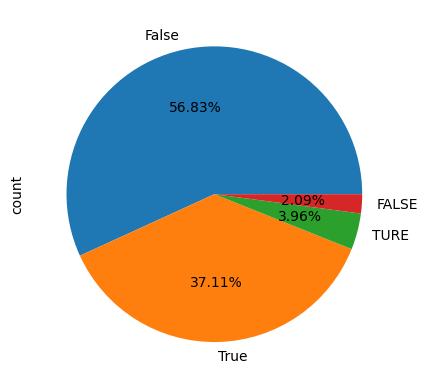

In [ ]:
data["exang"].value_counts().plot(kind="pie",autopct="%1.2f%%")

Some mistakes were found in the exang column.Upper and lower case False are found and True spell mistake words found.They both need to be replaced with original values.

In [ ]:
data["exang"]=data["exang"].replace({"FALSE":data["exang"].mode()[0],"TURE":data["exang"].unique()[1]})

In [ ]:
data["exang"].value_counts()

,count
exang,
False,535
True,373


### Stripplot

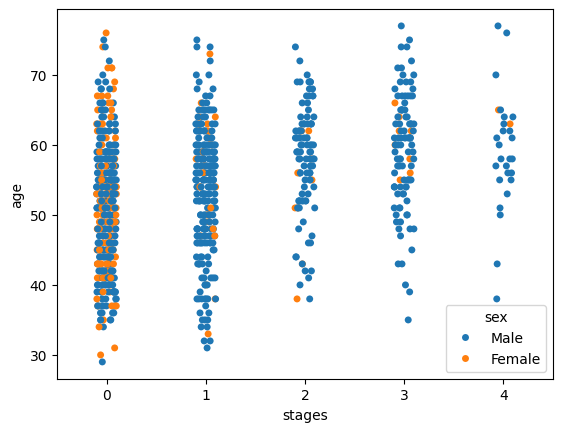

In [ ]:
sns.stripplot(x='stages', y='age',hue="sex",data=data)
plt.show()

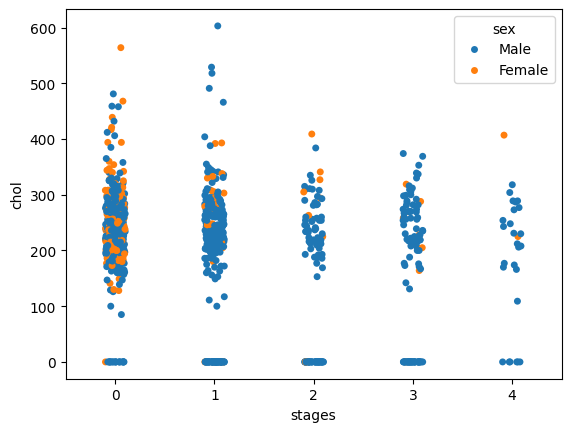

In [ ]:
sns.stripplot(x='stages', y='chol',hue="sex",data=data)
plt.show()

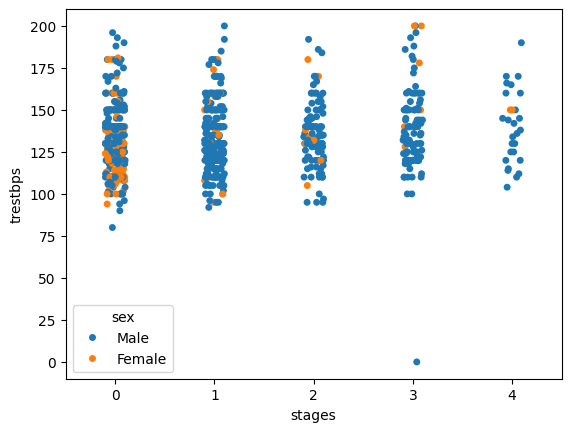

In [ ]:
sns.stripplot(x='stages', y='trestbps',hue="sex",data=data)
plt.show()

<Axes: xlabel='stages'>

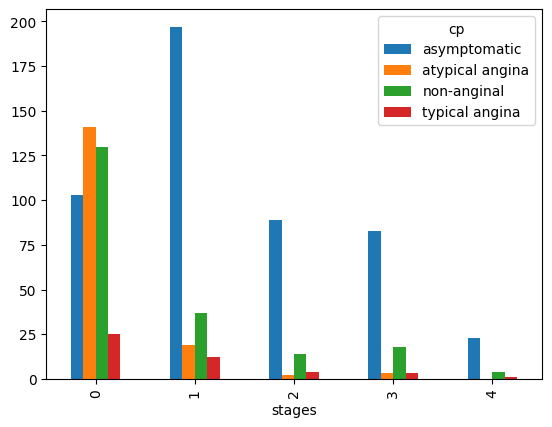

In [ ]:
pd.crosstab(data.stages,data.cp).plot(kind="bar")

<Axes: xlabel='sex'>

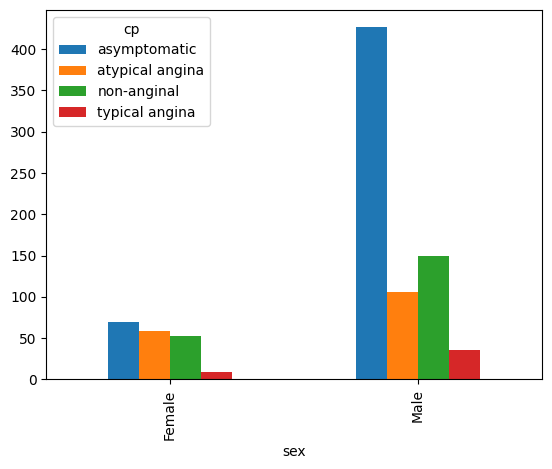

In [ ]:
pd.crosstab(data.sex,data.cp).plot(kind="bar")

<Axes: xlabel='stages'>

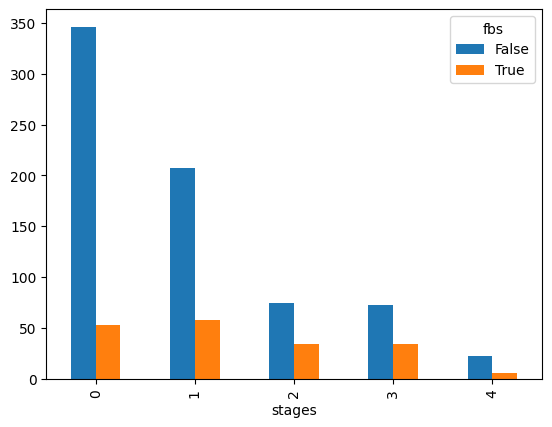

In [ ]:
pd.crosstab(data.stages,data.fbs).plot(kind="bar")

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,stages
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,NaN,downsloping,fixed defect,4


<Axes: xlabel='stages'>

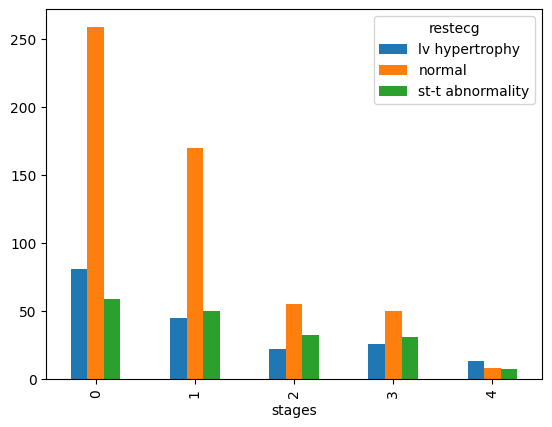

In [ ]:
pd.crosstab(data.stages,data.restecg).plot(kind="bar")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    bool   
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  stages    908 non-null    int64  
dtypes: bool(2), float64(1), int64(5), object(5)
memory usage: 79.9+ KB


### Checking for Null Values and Imputing

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,stages
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


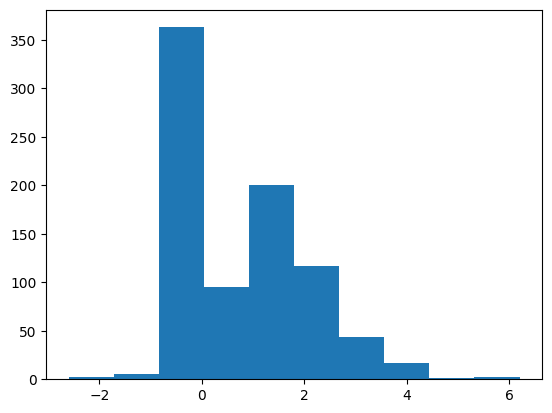

In [ ]:
plt.hist(data.oldpeak)
plt.show()

In [ ]:
data["oldpeak"].fillna(data["oldpeak"].mean(),inplace=True)

In [ ]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,stages
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.055826,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [ ]:
data[data.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,stages
764,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [ ]:
data.drop_duplicates(keep="first",inplace=True)

In [ ]:
data.reset_index(drop=True,inplace=True)

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,stages
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,reversable defect,4
903,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,reversable defect,4
904,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,normal,4
905,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,0.891253,downsloping,fixed defect,4


### Data types Conversion

In [ ]:
data["fbs"]=data["fbs"].astype("object")  #Data types are converting to apply the label encoding all at a time


In [ ]:
data["exang"]=data["exang"].astype("object")

## Label Encoding

In [ ]:
le=LabelEncoder()
def encoding(df):
  for col in df.columns:
    if df[col].dtype==object:
      df[col]=le.fit_transform(df[col])
  return df

In [ ]:
encoding(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,stages
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,0,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,0,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,0,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,1,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,1,0,125,0,0,1,120,0,1.500000,2,2,4
903,62,1,0,166,170,0,2,120,1,3.000000,1,2,4
904,56,1,2,170,0,0,0,123,1,2.500000,0,1,4
905,56,1,2,144,208,1,2,105,1,0.891253,0,0,4


## Standardization

In [ ]:
data[["age","trestbps","chol","thalch","oldpeak"]]=StandardScaler().fit_transform(data[["age","trestbps","chol","thalch","oldpeak"]])

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,stages
0,1.006097,1,3,0.568184,0.281318,1,0,0.523285,0,1.333854,0,0,0
1,-1.396447,1,1,0.077848,0.013691,0,1,-0.148399,0,-0.845392,1,0,0
2,0.350858,1,0,0.323016,-0.084439,0,1,0.448654,0,-0.466392,1,0,0
3,-0.195175,1,3,-0.755723,-0.137964,0,0,2.015918,0,-0.845392,1,0,0
4,0.350858,1,0,-1.147992,-0.004151,0,1,-0.372294,1,0.575856,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,-0.085969,1,0,-0.412488,-1.797250,0,1,-0.596189,0,0.575856,2,2,4
903,0.896890,1,0,1.597890,-0.280698,0,2,-0.596189,1,1.997103,1,2,4
904,0.241651,1,2,1.794024,-1.797250,0,0,-0.484242,1,1.523354,0,1,4
905,0.241651,1,2,0.519151,0.058296,1,2,-1.155926,1,-0.000931,0,0,4


## Splitting the Data into Training and Testing sets

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((725, 12), (182, 12), (725,), (182,))

## Applying the Decision Tree model

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=9)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [ ]:
pred_y=model.predict(x_test)

In [ ]:
accuracy_score(y_test,pred_y)  # we didnt get good accuracy.we need to try for best parameters which will improve accuracy

0.5604395604395604

## Parameters Tuning with Grid Search

In [ ]:
param_grid={
    "criterion":["gini","entropy"],
    "max_depth":[2,3,4,5,6,7,8,9,10],
    "min_samples_split":[2,3,4,5,6,7,8,9,10],
    "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]
}
grid_search=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
grid_search.best_params_,grid_search.best_score_

({'criterion': 'gini',
  'max_depth': 4,
  'min_samples_leaf': 9,
  'min_samples_split': 2},
 0.5503448275862068)

In [ ]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=4,min_samples_leaf=9,min_samples_split=4)  #Implementing the model with our best paramaters
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=9, min_samples_split=4)

In [ ]:
pred_y=model.predict(x_test)

### Model Evaluation

In [ ]:
accuracy_score(y_test,pred_y)

0.5604395604395604

Accuracy we got 56% with our best parameters.

### Classification Report

In [ ]:
print(classification_report(y_test,pred_y))


              precision    recall  f1-score   support

           0       0.76      0.83      0.79        89
           1       0.44      0.53      0.48        47
           2       0.12      0.05      0.07        20
           3       0.11      0.12      0.11        17
           4       0.00      0.00      0.00         9

    accuracy                           0.56       182
   macro avg       0.28      0.31      0.29       182
weighted avg       0.51      0.56      0.53       182



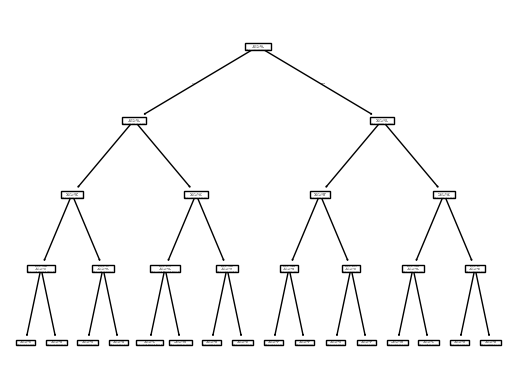

In [ ]:
tree.plot_tree(model)
plt.show()

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'stages'],
      dtype='object')

## Visualizing the Decision tree structure

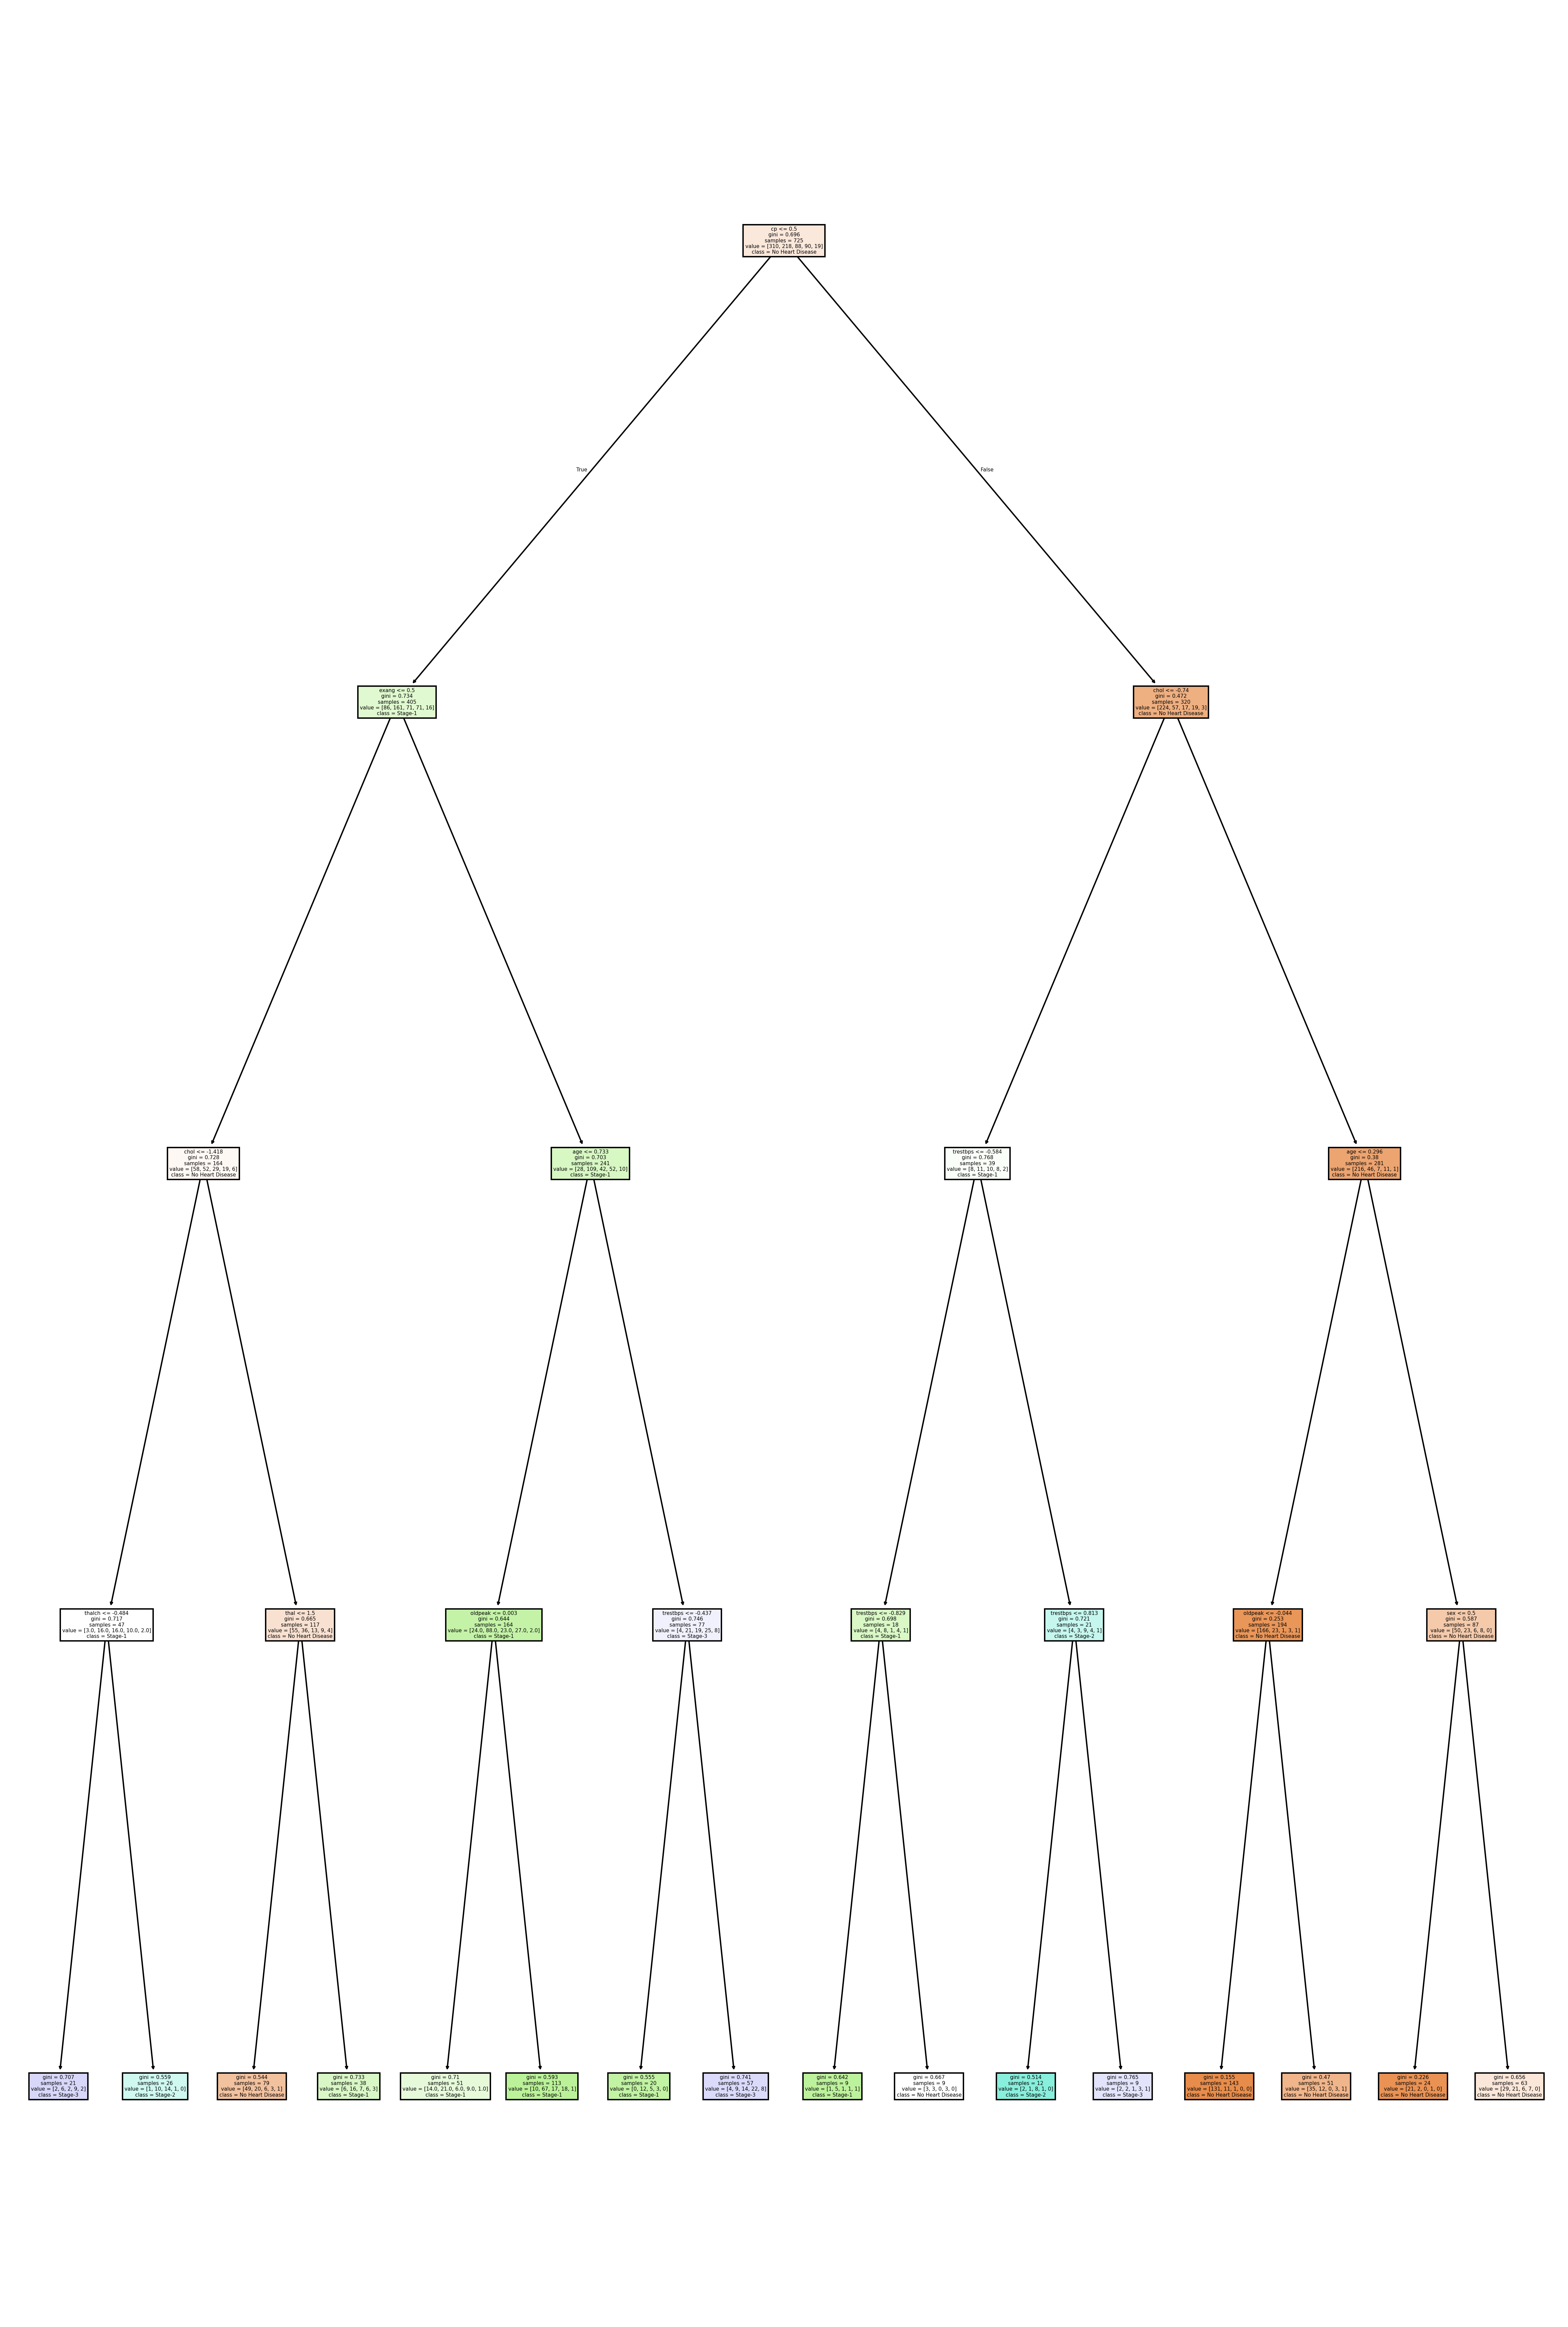

In [ ]:
fn=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal']
cn=["No Heart Disease","Stage-1","Stage-2","Stage-3","Stage-4"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,30), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

By the above Tree Diagram,we can conclude CP column is the most important feature following exang and cholestrol are also important columns.